In [34]:
import numpy as np
import tensorflow as tf
import ipywidgets as widgets

from tensorflow import keras
from PIL import Image
from IPython.display import display

In [35]:
# Basic CNN classification model referenced from https://www.tensorflow.org/tutorials/images/classification
# Keras image parameters
batch_size = 32
img_height = 224
img_width = 224

In [36]:
# Load model
new_model = tf.keras.models.load_model("models/crop_disease_detection_model.keras")

new_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,339,496 (73.77 MB)

 Trainable params: 6,446,498 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,892,998 (49.18 MB)

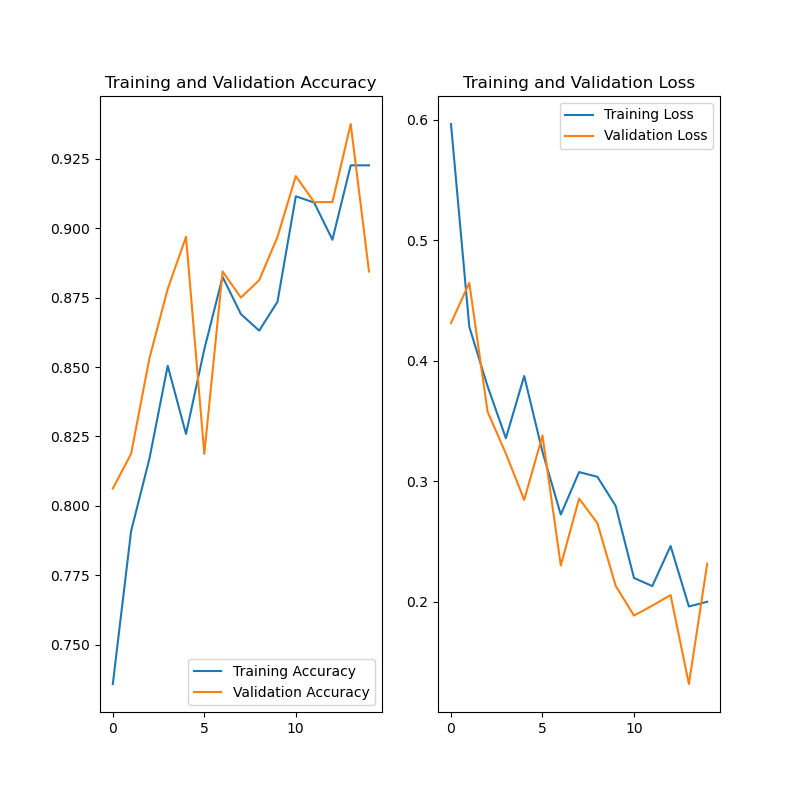

In [37]:
train_loss = Image.open('figures/train_loss.png')
display(train_loss)

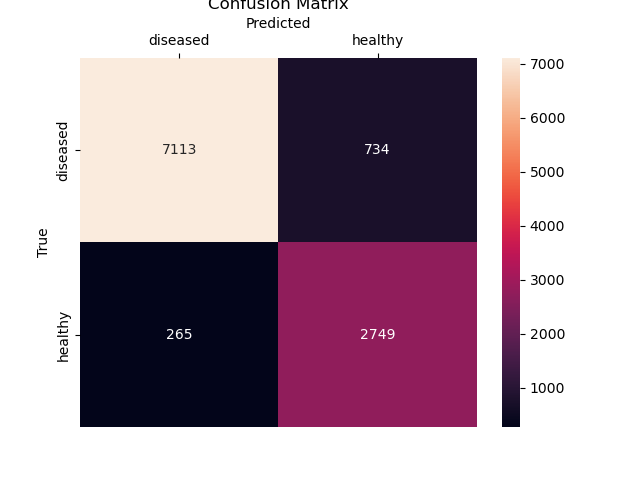

In [38]:
confusion_matrix = Image.open('figures/confusion_matrix.png')
display(confusion_matrix)

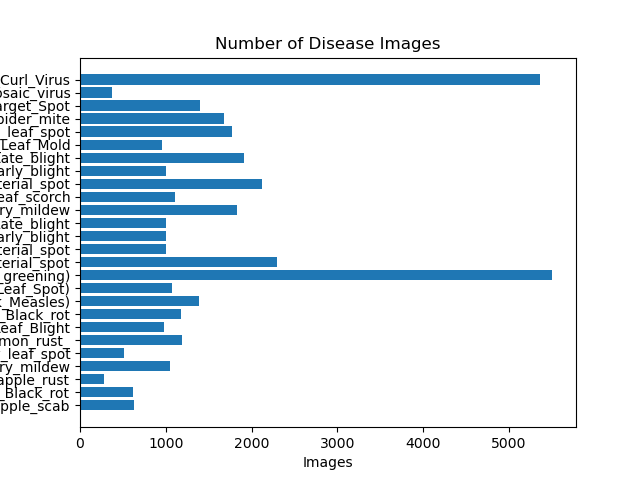

In [39]:
num_disease_img = Image.open('figures/num_disease_images.png')
display(num_disease_img)

In [40]:
class_names = ['diseased', 'healthy']

In [41]:
# Widget code referenced from https://ashejim.github.io/C964/task2_c/example_sup_class/sup_class_ex-ui.html
# UI - Create a widget where the user can input an image URL and receive the model's prediction
url_widget = widgets.Text(description='Image URL')

button_predict = widgets.Button(description='Predict')
button_output = widgets.Label(value='Enter an image URL and press the \"Predict\" button.')

def on_click_predict(b):
    test_image_path = tf.keras.utils.get_file('test_img', origin=url_widget.value)
    img = tf.keras.utils.load_img(test_image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    prediction = new_model.predict(img_array)
    score = tf.nn.softmax(prediction[0])

    button_output.value = 'The image is predicted to be {} with a {:.2f} percent certainty.'.format(class_names[np.argmax(score)], 100 * np.max(score))

button_predict.on_click(on_click_predict)

vbox = widgets.VBox(children=[url_widget, button_predict, button_output])
display(vbox)